In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
pssim_3d_file = "/datassd/pipeline_ptcl/client_ptcl/160317_moonbaby1_with_ground/o3d_ptcl_draco_wo_cull/3D_pssim.csv"
data = pd.read_csv(pssim_3d_file)

In [3]:
data

,Frame,DRACO_CL,DRACO_QP,PSSIM_GEO_AB,PSSIM_GEO_BA,PSSIM_COLOR_AB,PSSIM_COLOR_BA
0,1000,0,0,100.00,100.00,100.00,100.00
1,1000,0,1,0.23,9.10,87.59,69.76
2,1000,0,2,0.61,10.26,86.09,71.38
3,1000,0,3,1.49,14.74,87.32,78.95
4,1000,0,4,3.22,12.90,89.88,86.12
...,...,...,...,...,...,...,...
1235,4000,9,26,100.00,100.00,100.00,100.00
1236,4000,9,27,100.00,100.00,100.00,100.00
1237,4000,9,28,100.00,100.00,100.00,100.00
1238,4000,9,29,100.00,100.00,100.00,100.00


FrameID:  1000


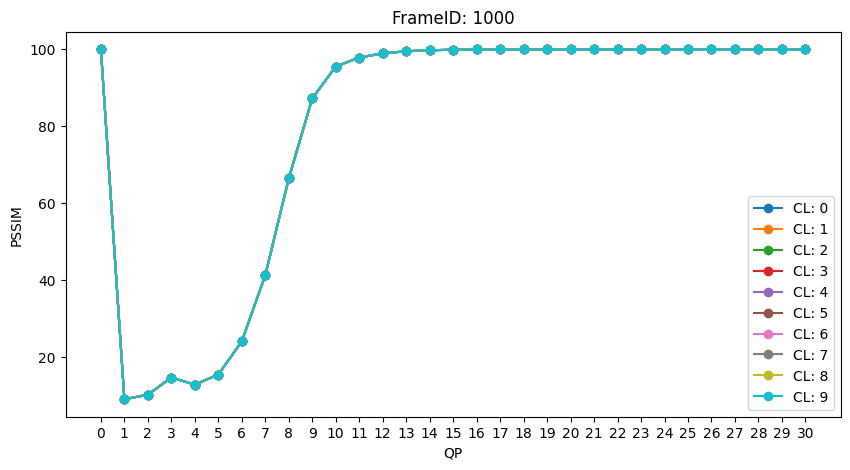

FrameID:  2000


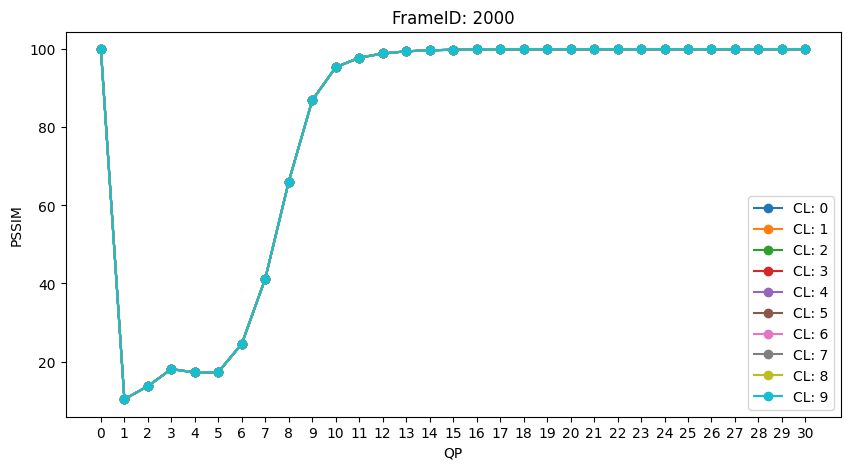

FrameID:  3000


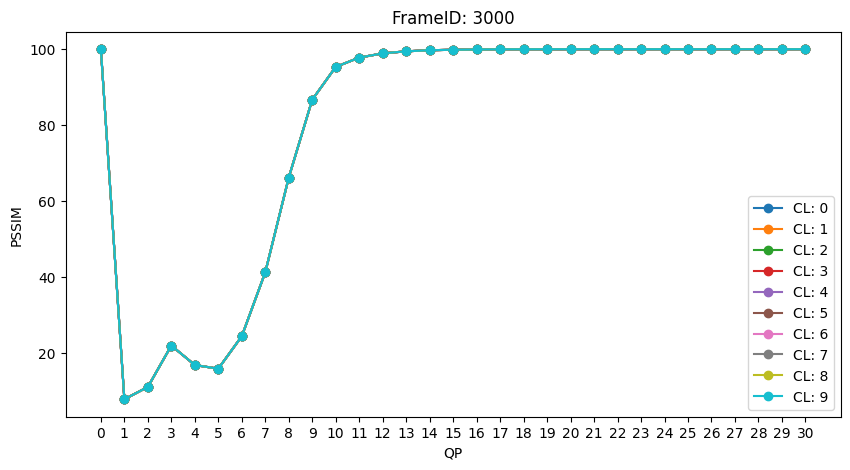

FrameID:  4000


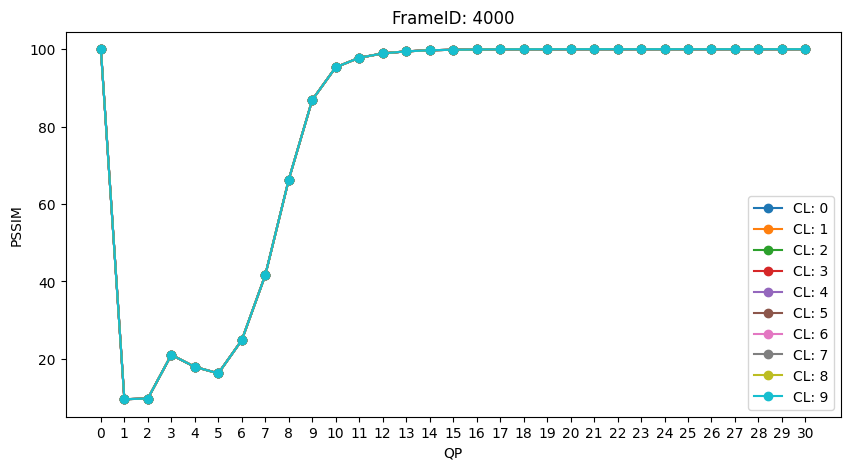

In [14]:
# Check which levels of draco compression matters to us
for frameID in range(1000, 4001, 1000):
    print("FrameID: ", frameID)
    frame_data = data[data['Frame'] == frameID]
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    for cl in range(0, 10):
        cl_data = frame_data[frame_data['DRACO_CL'] == cl]

        # Remove data where QP is 0
        # cl_data = cl_data[cl_data['DRACO_QP'] != 0]
        
        ax.plot(cl_data['DRACO_QP'], cl_data['PSSIM_GEO_BA'], label="CL: " + str(cl), marker='o')
    ax.set_title("FrameID: " + str(frameID))
    ax.set_xlabel("QP")
    ax.set_xticks(np.arange(0, 31, 1))
    ax.set_ylabel("PSSIM")
    ax.legend()
    plt.show()